# Test notebook  
Import libraries:

In [1]:
import functions as fun
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the data from the file *"your_dataset.csv"*:

In [2]:
# Load the data
data = pd.read_csv('../Data/your_dataset.csv')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.205492,5.823226,98.837539,-1.075852,0.999205,0.911543,3.623558,-1.720267,-0.346191,-54.708330,-1
1,1.391530,3.611581,98.857197,-5.020318,0.677165,0.999492,3.413112,4.253865,2.041603,-54.317291,1
2,1.692571,-0.887019,100.901276,-0.595548,0.177550,-0.915495,4.320264,0.907834,3.126815,-56.397484,-1
3,4.289320,1.416843,100.784735,-2.897154,-0.066972,-0.786173,2.093003,1.336237,2.183829,-56.197728,1
4,0.542420,-1.010095,100.015580,-3.070705,0.088324,-0.242669,0.767942,-0.284683,-2.104145,-55.794045,1


### Train and Test the Perceptron Algorithm: 


In [3]:
zol_training_perceptron=[]
zol_test_perceptron=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(data)
    
    # Run the prediction on the training set
    prediction_train = fun.perceptron(x_train, y_train, 0.5, 1000)
    # Calculate the 0-1 loss on the training set
    zol_training_perceptron.append(fun.zero_one_loss(prediction_train[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    x_test_perceptron = np.insert(x_test, 0, 1, axis=1)  # Insert a column of ones for the bias term
    prediction_test = np.sign(np.dot(x_test_perceptron, prediction_train[0])) # Predict the test set
    zol_test_perceptron.append(fun.zero_one_loss(prediction_test, y_test, y_test.shape[0]))
    

### Train and Test the Pegasos algorithm:

In [8]:
zol_training_pegasos=[]
zol_test_pegasos=[]
for i in range(10):
    # Training and test set
    x_train, x_test, y_train, y_test = fun.split_data(data)
    
    # Run the prediction on the training set
    prediction_train_pegasos = fun.pegasos(x_train, y_train, 0.5, 1000, 512)
    # Calculate the 0-1 loss on the training set
    zol_training_pegasos.append(fun.zero_one_loss(prediction_train_pegasos[1], y_train, y_train.shape[0]))
    
    # Predict using the test set
    prediction_test_pegasos = np.sign(np.dot(x_test, prediction_train_pegasos[0])) # Predict the test set
    zol_test_pegasos.append(fun.zero_one_loss(prediction_test_pegasos, y_test, y_test.shape[0]))


Graphical representation of the 0-1 loss for the Perceptron and Pegasos algorithms:

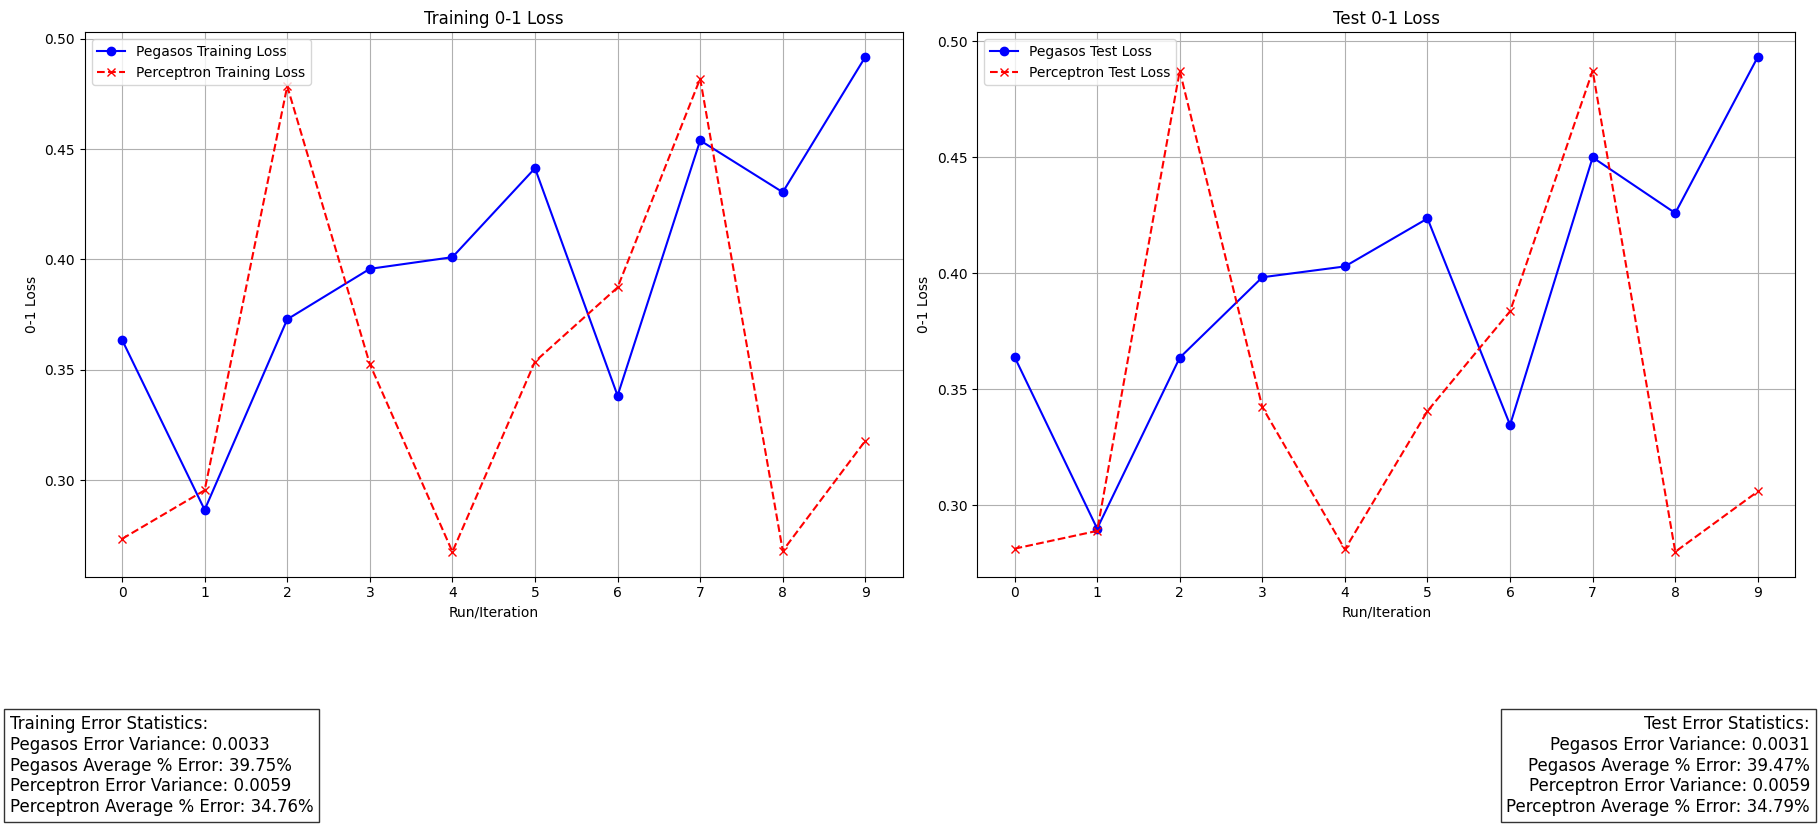

In [52]:
# Calculate variance and average percentage
variance_zol_training_pegasos = np.var(zol_training_pegasos)
average_zol_training_pegasos_percentage = np.mean(zol_training_pegasos) * 100

variance_zol_test_pegasos = np.var(zol_test_pegasos)
average_zol_test_pegasos_percentage = np.mean(zol_test_pegasos) * 100

variance_zol_training_perceptron = np.var(zol_training_perceptron)
average_zol_training_perceptron_percentage = np.mean(zol_training_perceptron) * 100

variance_zol_test_perceptron = np.var(zol_test_perceptron)
average_zol_test_perceptron_percentage = np.mean(zol_test_perceptron) * 100

# Plotting
plt.figure(figsize=(18, 8))

# Training Loss Graph
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(zol_training_pegasos, marker='o', linestyle='-', color='b', label='Pegasos Training Loss')
plt.plot(zol_training_perceptron, marker='x', linestyle='--', color='r', label='Perceptron Training Loss')
plt.title('Training 0-1 Loss')
plt.xlabel('Run/Iteration')
plt.ylabel('0-1 Loss')
plt.xticks(range(len(zol_training_pegasos)))  # Set x-ticks to correspond with the number of runs
plt.grid(True)
plt.legend()

# Test Loss Graph
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
plt.plot(zol_test_pegasos, marker='o', linestyle='-', color='b', label='Pegasos Test Loss')
plt.plot(zol_test_perceptron, marker='x', linestyle='--', color='r', label='Perceptron Test Loss')
plt.title('Test 0-1 Loss')
plt.xlabel('Run/Iteration')
plt.ylabel('0-1 Loss')
plt.xticks(range(len(zol_test_pegasos)))  # Set x-ticks to correspond with the number of runs
plt.grid(True)
plt.legend()

plt.figtext(0, 0.1, 
            f'Training Error Statistics:\n'
            f'Pegasos Error Variance: {variance_zol_training_pegasos:.4f}\n'
            f'Pegasos Average % Error: {average_zol_training_pegasos_percentage:.2f}%\n'
            f'Perceptron Error Variance: {variance_zol_training_perceptron:.4f}\n'
            f'Perceptron Average % Error: {average_zol_training_perceptron_percentage:.2f}%', 
            ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.figtext(1, 0.1, 
            f'Test Error Statistics:\n'
            f'Pegasos Error Variance: {variance_zol_test_pegasos:.4f}\n'
            f'Pegasos Average % Error: {average_zol_test_pegasos_percentage:.2f}%\n'
            f'Perceptron Error Variance: {variance_zol_test_perceptron:.4f}\n'
            f'Perceptron Average % Error: {average_zol_test_perceptron_percentage:.2f}%', 
            ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to provide extra space for annotations
plt.tight_layout(rect=[0, 0.2, 1, 1])  # Adjusts subplot parameters to fit the text

# Show the plots
plt.show()